In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 61kB 2.0MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import kerastuner as kt

In [ ]:
import os
import zipfile

local_zip = '/content/dataset_resized.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
training_drawings = os.listdir('/tmp/dataset_resized/training_set/drawings')
training_engraving = os.listdir('/tmp/dataset_resized/training_set/engraving')
training_iconography = os.listdir('/tmp/dataset_resized/training_set/iconography')
training_painting = os.listdir('/tmp/dataset_resized/training_set/painting')
training_sculpture = os.listdir('/tmp/dataset_resized/training_set/sculpture')
testing_drawings = os.listdir('/tmp/dataset_resized/validation_set/drawings')
testing_engraving = os.listdir('/tmp/dataset_resized/validation_set/engraving')
testing_iconography = os.listdir('/tmp/dataset_resized/validation_set/iconography')
testing_painting = os.listdir('/tmp/dataset_resized/validation_set/painting')
testing_sculpture = os.listdir('/tmp/dataset_resized/validation_set/sculpture')
print(len(training_drawings))
print(len(training_engraving))
print(len(training_iconography))
print(len(training_painting))
print(len(training_sculpture))
print(len(testing_drawings))
print(len(testing_engraving))
print(len(testing_iconography))
print(len(testing_painting))
print(len(testing_sculpture))

1107
757
2077
2042
1738
122
84
231
228
191


/tmp/dataset_resized/training_set/drawings/images (32).jpg


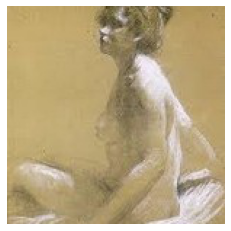

/tmp/dataset_resized/training_set/drawings/i - 349.jpg


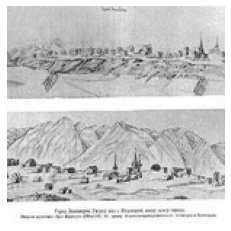

/tmp/dataset_resized/validation_set/drawings/i - 1063.jpg


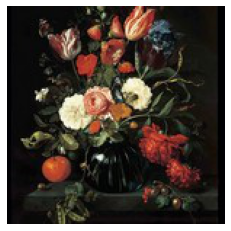

/tmp/dataset_resized/validation_set/drawings/3429_mainfoto_05.jpg


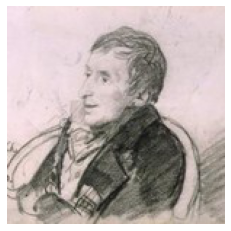

/tmp/dataset_resized/training_set/engraving/i - 349.jpg


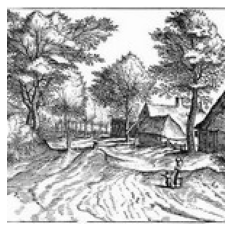

/tmp/dataset_resized/training_set/engraving/3315_mainfoto_05.jpg


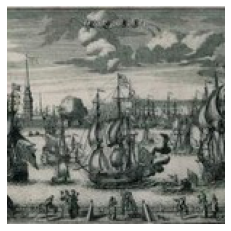

/tmp/dataset_resized/validation_set/engraving/286.jpg


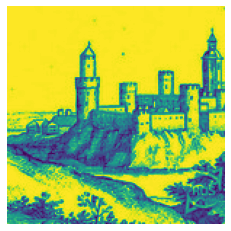

/tmp/dataset_resized/validation_set/engraving/i - 461.jpg


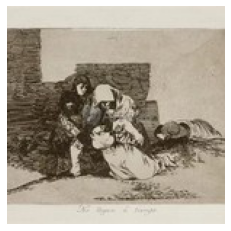

/tmp/dataset_resized/training_set/iconography/125.jpg


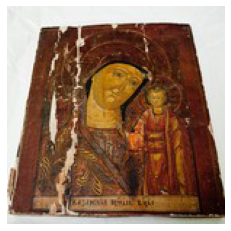

/tmp/dataset_resized/training_set/iconography/i - 349.jpg


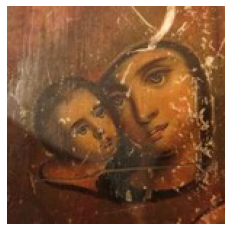

/tmp/dataset_resized/validation_set/iconography/i - 1250.jpg


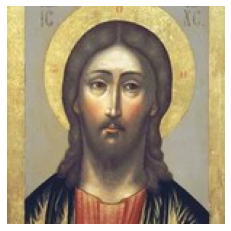

/tmp/dataset_resized/validation_set/iconography/i - 557.jpg


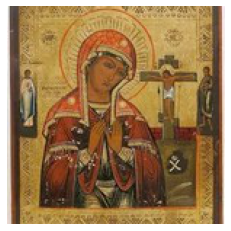

/tmp/dataset_resized/training_set/painting/0428.jpg


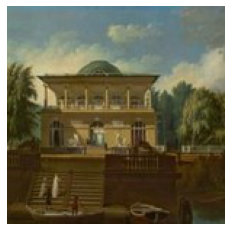

/tmp/dataset_resized/training_set/painting/1320.jpg


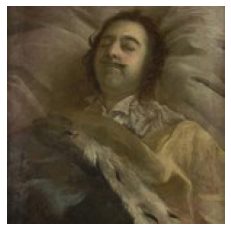

/tmp/dataset_resized/validation_set/painting/1676.jpg


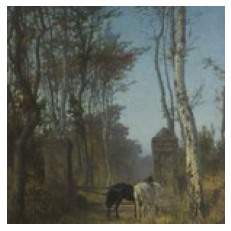

/tmp/dataset_resized/validation_set/painting/0451.jpg


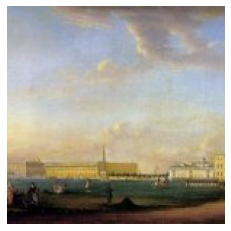

/tmp/dataset_resized/training_set/sculpture/i - 1250.jpg


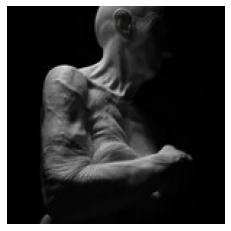

/tmp/dataset_resized/training_set/sculpture/i - 539.jpg


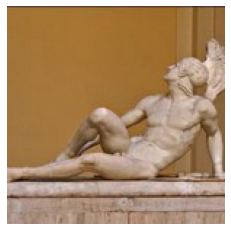

/tmp/dataset_resized/validation_set/sculpture/i - 349.jpg


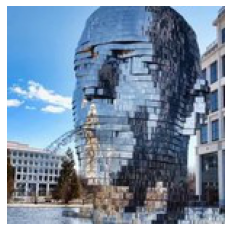

/tmp/dataset_resized/validation_set/sculpture/i - 916.jpg


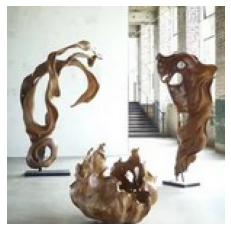

In [ ]:
# Visualisasi beberapa gambar dari 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_draw = [os.path.join("/tmp/dataset_resized/training_set/drawings", i)
                  for i in os.listdir("/tmp/dataset_resized/training_set/drawings")[:2]]
test_draw = [os.path.join("/tmp/dataset_resized/validation_set/drawings", i)
                  for i in os.listdir("/tmp/dataset_resized/validation_set/drawings")[:2]]
train_eng = [os.path.join("/tmp/dataset_resized/training_set/engraving", i)
                  for i in os.listdir("/tmp/dataset_resized/training_set/engraving")[:2]]
test_eng = [os.path.join("/tmp/dataset_resized/validation_set/engraving", i)
                  for i in os.listdir("/tmp/dataset_resized/validation_set/engraving")[:2]]
train_icon = [os.path.join("/tmp/dataset_resized/training_set/iconography", i)
                  for i in os.listdir("/tmp/dataset_resized/training_set/iconography")[:2]]
test_icon = [os.path.join("/tmp/dataset_resized/validation_set/iconography", i)
                  for i in os.listdir("/tmp/dataset_resized/validation_set/iconography")[:2]]
train_paint = [os.path.join("/tmp/dataset_resized/training_set/painting", i)
                  for i in os.listdir("/tmp/dataset_resized/training_set/painting")[:2]]
test_paint = [os.path.join("/tmp/dataset_resized/validation_set/painting", i)
                  for i in os.listdir("/tmp/dataset_resized/validation_set/painting")[:2]]
train_sculp = [os.path.join("/tmp/dataset_resized/training_set/sculpture", i)
                  for i in os.listdir("/tmp/dataset_resized/training_set/sculpture")[:2]]
test_sculp = [os.path.join("/tmp/dataset_resized/validation_set/sculpture", i)
                  for i in os.listdir("/tmp/dataset_resized/validation_set/sculpture")[:2]]

for i, img_path in enumerate(train_draw+test_draw+train_eng+test_eng+train_icon+test_icon+train_paint+test_paint+train_sculp+test_sculp):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
TRAINING_DIR = "/tmp/dataset_resized/training_set/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/dataset_resized/validation_set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
  color_mode='rgb',
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, steps_per_epoch=200, validation_data = validation_generator, verbose = 1, validation_steps=20)

Found 7721 images belonging to 5 classes.
Found 856 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_______________________________________

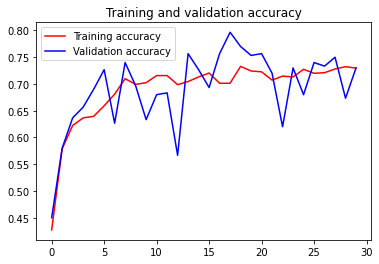

<Figure size 432x288 with 0 Axes>

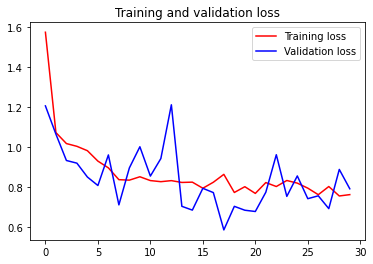

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()